In [79]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt 

In [17]:
data = pd.read_csv("cc_merged_0412.csv",sep='\t')

In [18]:
data.head(20)

,Unnamed: 0,index,year,caseid,opinion_type,judge_name,decision,date,Author,Affirmed,...,suffix,month_3,length_3m,month_6,length_6m,month_3m_b,month_3_b,length_3m_dif,txt,x_dem_p
0,0,2304,1993,X35807,contentMajOp,PER CURIAM,affirmed,1993-08-04,NaN,1.0,...,,1993-11-04,49.758998,1994-02-04,49.603455,1993-05-04,1993-05-04,-1.099144,per curiam: charo appeals his sentence for co...,0.292902
1,1,2796,1992,X3AD9D,contentMajOp,LOGAN,affirmed,1992-11-13,LOGAN,1.0,...,JR.,1993-02-13,52.334119,1993-05-13,51.257239,1992-08-13,1992-08-13,1.663181,"logan , circuit judge. the only issue in this...",0.328425
2,2,2805,1992,X3ADTB,contentMajOp,LOGAN,reversed,1992-12-29,LOGAN,0.0,...,JR.,1993-03-29,50.282495,1993-06-29,51.134191,1992-09-29,1992-09-29,-3.563471,"logan , circuit judge. defendant bernard d. r...",0.328425
3,3,2814,1997,X37GPR,contentMajOp,JOHN C,affirmed,1997-02-11,PORFILIO,1.0,...,JR.,1997-05-11,51.570342,1997-08-11,51.983779,1996-11-11,1996-11-11,0.760434,"john c. porfilio , circuit judge. defendant b...",0.360773
4,4,2816,1999,X4QAM7,contentMajOp,HOLLOWAY,affirmed,1999-01-04,HOLLOWAY,1.0,...,JR.,1999-04-04,59.568882,1999-07-04,59.854130,1998-10-04,1998-10-04,-0.630426,"holloway , circuit judge. mr. unser brings th...",0.411135
5,5,2817,1998,XN5ACRQNB5G0,contentMajOp,JOHN C,affirmed,1998-02-23,PORFILIO,1.0,...,JR.,1998-05-23,63.292860,1998-08-23,61.762051,1997-11-23,1997-11-23,3.591201,"john c. porfilio , circuit judge. these three...",0.399229
6,6,2819,1991,X57EQB,contentMajOp,JOHN P,reversed,1991-12-17,MOORE,0.0,...,JR.,1992-03-17,50.717301,1992-06-17,50.744294,1991-09-17,1991-09-17,1.751541,"john p. moore , circuit judge. james l. norma...",0.350113
7,7,2820,1991,XAC38F,contentMajOp,BRORBY,affirmed,1991-12-31,BRORBY,1.0,...,JR.,1992-03-31,49.808413,1992-06-30,50.642475,1991-09-30,1991-09-30,0.303059,"brorby , circuit judge. defendant juan dozal-...",0.350113
8,8,2821,1995,X4NT3Q,contentMajOp,HOLLOWAY,affirmed,1995-10-18,HOLLOWAY,1.0,...,JR.,1996-01-18,50.519827,1996-04-18,51.128395,1995-07-18,1995-07-18,-0.039012,"holloway , circuit judge. petitioner-appellan...",0.341123
9,9,2822,2000,X3FBF1,contentMajOp,TACHA,affirmed,2000-04-04,TACHA,1.0,...,JR.,2000-07-04,59.489909,2000-10-04,59.785273,2000-01-04,2000-01-04,-1.213819,"tacha , circuit judge. defendant tony smith a...",0.440144


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8434 entries, 0 to 8433
Columns: 298 entries, Unnamed: 0 to x_dem_p
dtypes: float64(211), int64(61), object(26)
memory usage: 19.2+ MB


In [20]:
data.columns.values

array(['Unnamed: 0', 'index', 'year', 'caseid', 'opinion_type',
       'judge_name', 'decision', 'date', 'Author', 'Affirmed',
       'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated',
       'VacatedInPart', 'Circuit', 'judgeid1', 'judgeid2', 'judgeid3',
       'x_dem_x', 'x_republican_x', 'x_instate_ba_x', 'x_elev_x',
       'x_unity_x', 'x_aba_x', 'x_crossa_x', 'x_pfedjdge_x',
       'x_pindreg1_x', 'x_plawprof_x', 'x_pscab_x', 'x_pcab_x', 'x_pusa_x',
       'x_pssenate_x', 'x_paag_x', 'x_psp_x', 'x_pslc_x', 'x_pssc_x',
       'x_pshouse_x', 'x_psg_x', 'x_psgo_x', 'x_psenate_x', 'x_psatty_x',
       'x_pprivate_x', 'x_pmayor_x', 'x_plocct_x', 'x_phouse_x',
       'x_pgov_x', 'x_pda_x', 'x_pcc_x', 'x_pccoun_x', 'x_pausa_x',
       'x_pasatty_x', 'x_pag_x', 'x_pada_x', 'x_pgovt_x', 'x_llm_sjd_x',
       'x_protestant_x', 'x_evangelical_x', 'x_mainline_x',
       'x_noreligion_x', 'x_catholic_x', 'x_jewish_x', 'x_black_x',
       'x_nonwhite_x', 'x_female_x', 'x_jd_public_x', '

In [21]:
# affrimed,affimed, ..., other, + txt to predict length_3m

In [22]:
data_use = data[['Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','txt','length_3m_dif']]

In [23]:
data_use.head(10)

,Affirmed,AffirmedInPart,Reversed,ReversedInPart,Vacated,VacatedInPart,txt,length_3m_dif
0,1.0,0.0,0.0,0.0,0.0,0.0,per curiam: charo appeals his sentence for co...,-1.099144
1,1.0,0.0,0.0,0.0,0.0,0.0,"logan , circuit judge. the only issue in this...",1.663181
2,0.0,0.0,1.0,0.0,0.0,0.0,"logan , circuit judge. defendant bernard d. r...",-3.563471
3,1.0,0.0,0.0,0.0,0.0,0.0,"john c. porfilio , circuit judge. defendant b...",0.760434
4,1.0,0.0,0.0,0.0,0.0,0.0,"holloway , circuit judge. mr. unser brings th...",-0.630426
5,1.0,0.0,0.0,0.0,0.0,0.0,"john c. porfilio , circuit judge. these three...",3.591201
6,0.0,0.0,0.0,0.0,1.0,0.0,"john p. moore , circuit judge. james l. norma...",1.751541
7,1.0,0.0,0.0,0.0,0.0,0.0,"brorby , circuit judge. defendant juan dozal-...",0.303059
8,1.0,0.0,0.0,0.0,0.0,0.0,"holloway , circuit judge. petitioner-appellan...",-0.039012
9,1.0,0.0,0.0,0.0,0.0,0.0,"tacha , circuit judge. defendant tony smith a...",-1.213819


In [24]:
data_use['txt'].iloc[0]

' per curiam: charo appeals his sentence for conspiracy to possess with intent to distribute cocaine and money laundering. he maintains that the district court erred in refusing to grant him a two-level reduction for acceptance of responsibility under u.s.s.g. 3e1.1(a) . he contends that he manifested acceptance of responsibility by admitting his involvement in the offense, showing remorse, and cooperating with law enforcement officials. the government responds that the district court\'s finding that charo had not accepted responsibility for the offense conduct was not clearly erroneous. the sentencing court\'s determination that a defendant is not entitled to a reduction for acceptance of responsibility is entitled to great deference and will not be overturned unless it is clearly erroneous. united states v. spraggins , 868 f.2d 1541, 1543 (11th cir.1989). section 3e1.1(a) requires a sentencing court to reduce the offense level by two levels "if the defendant clearly demonstrates a re

In [25]:
#create bin:
#0: decrease
#1: same
#2: increase
def create_bin(row):
    if row['length_3m_dif']<-0.2:
        return 0
    elif row['length_3m_dif']>0.2:
        return 2
    else:
        return 1

In [26]:
data_use['bin']=data_use.apply(create_bin,axis=1)

/share/apps/python3/3.5.3/intel/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
data_use.head()

,Affirmed,AffirmedInPart,Reversed,ReversedInPart,Vacated,VacatedInPart,txt,length_3m_dif,bin
0,1.0,0.0,0.0,0.0,0.0,0.0,per curiam: charo appeals his sentence for co...,-1.099144,0
1,1.0,0.0,0.0,0.0,0.0,0.0,"logan , circuit judge. the only issue in this...",1.663181,2
2,0.0,0.0,1.0,0.0,0.0,0.0,"logan , circuit judge. defendant bernard d. r...",-3.563471,0
3,1.0,0.0,0.0,0.0,0.0,0.0,"john c. porfilio , circuit judge. defendant b...",0.760434,2
4,1.0,0.0,0.0,0.0,0.0,0.0,"holloway , circuit judge. mr. unser brings th...",-0.630426,0


In [28]:
#data1_attemp = data_use[['txt','length_3m_dif']]

In [29]:
from sklearn.cross_validation import train_test_split
from numpy.random import RandomState

RS1 = RandomState(1)
train_data = data_use.sample(frac = 0.75, random_state = 200)
test_data = data_use.drop(train_data.index)

x_train = train_data['txt']
x_test = test_data['txt']
Y_train = train_data['length_3m_dif']
Y_test = test_data['length_3m_dif']

print(train_data.shape)
print(test_data.shape)

(6326, 9)
(2108, 9)


In [15]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer_1gram = CountVectorizer(stop_words = 'english', binary = False)
count_vectorizer_2gram = CountVectorizer(stop_words = 'english', ngram_range = (1,2) , binary = False)
tfid_vectorizer_1gram = TfidfVectorizer(stop_words = 'english', binary = False)
tfid_vectorizer_2gram = TfidfVectorizer(stop_words = 'english', ngram_range= (1,2), binary = False)

count_vectorizer_1gram.fit(x_train)
count_vectorizer_2gram.fit(x_train)

tfid_vectorizer_1gram.fit(x_train)
tfid_vectorizer_2gram.fit(x_train)


#count_vectorizer
count_train_1gram = count_vectorizer_1gram.transform(x_train)
count_test_1gram = count_vectorizer_1gram.transform(x_test)

count_train_2gram = count_vectorizer_2gram.transform(x_train)
count_test_2gram = count_vectorizer_2gram.transform(x_test)

#tfid_vectorizer
tf_train_1gram = tfid_vectorizer_1gram.transform(x_train)
tf_test_1gram = tfid_vectorizer_1gram.transform(x_test)

tf_train_2gram = tfid_vectorizer_2gram.transform(x_train)
tf_test_2gram = tfid_vectorizer_2gram.transform(x_test)

CPU times: user 3min 20s, sys: 2.73 s, total: 3min 23s
Wall time: 3min 23s


In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [17]:
#count 1 gram:

In [18]:
lr_base_count_1gram = linear_model.LinearRegression()
lr_base_count_1gram.fit(count_train_1gram, Y_train)
lr_base_count_1gram_pred = lr_base_count_1gram.predict(count_test_1gram)
count_1gram_base_mae = mean_absolute_error(Y_test, lr_base_count_1gram_pred)

In [19]:
count_1gram_base_mae

2.69964025579824

In [20]:
count_1gram_base_mae_r2 = r2_score(Y_test, lr_base_count_1gram_pred)

In [21]:
count_1gram_base_mae_r2

-2.8035214992717261

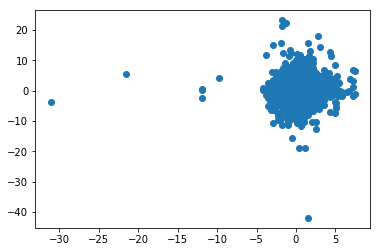

In [22]:
plt.scatter(Y_test,lr_base_count_1gram_pred)
plt.show()

In [23]:
#count 2 gram:

In [24]:
lr_base_count_2gram = linear_model.LinearRegression()
lr_base_count_2gram.fit(count_train_2gram, Y_train)
lr_base_count_2gram_pred = lr_base_count_2gram.predict(count_test_2gram)
count_2gram_base_mae = mean_absolute_error(Y_test, lr_base_count_2gram_pred)

In [25]:
count_2gram_base_mae

1.7585600238429082

In [26]:
count_2gram_base_mae_r2 = r2_score(Y_test, lr_base_count_2gram_pred)

In [27]:
count_2gram_base_mae_r2

-0.53133179890467863

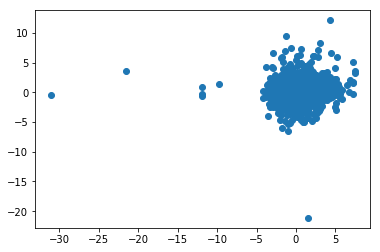

In [28]:
plt.scatter(Y_test,lr_base_count_2gram_pred)
plt.show()

In [29]:
# tfidf 1 gram:

In [30]:
lr_base_tfidf_1gram = linear_model.LinearRegression()
lr_base_tfidf_1gram.fit(tf_train_1gram, Y_train)
lr_base_tfidf_1gram_pred = lr_base_tfidf_1gram.predict(tf_test_1gram)
tfidf_1gram_base_mae = mean_absolute_error(Y_test, lr_base_tfidf_1gram_pred)

In [31]:
tfidf_1gram_base_mae

1.7085882973015794

In [32]:
tfidf_1gram_base_mae_r2 = r2_score(Y_test, lr_base_tfidf_1gram_pred)

In [33]:
tfidf_1gram_base_mae_r2

-0.37162225423885853

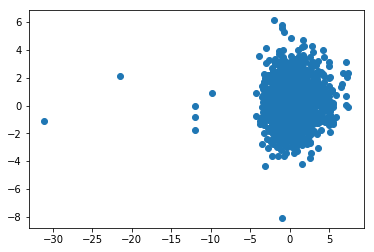

In [34]:
plt.scatter(Y_test,lr_base_tfidf_1gram_pred)
plt.show()

In [35]:
# tfidf 2 gram:

In [36]:
lr_base_tfidf_2gram = linear_model.LinearRegression()
lr_base_tfidf_2gram.fit(tf_train_2gram, Y_train)
lr_base_tfidf_2gram_pred = lr_base_tfidf_2gram.predict(tf_test_2gram)
tfidf_2gram_base_mae = mean_absolute_error(Y_test, lr_base_tfidf_2gram_pred)

In [37]:
tfidf_2gram_base_mae

1.4516721052128747

In [38]:
tfidf_2gram_base_mae_r2 = r2_score(Y_test, lr_base_tfidf_2gram_pred)

In [39]:
tfidf_2gram_base_mae_r2

-0.072263646659945113

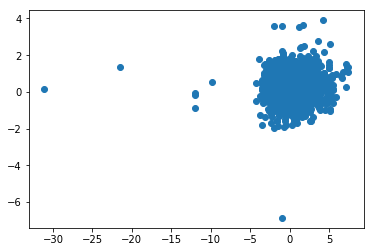

In [40]:
plt.scatter(Y_test,lr_base_tfidf_2gram_pred)
plt.show()

In [41]:
#using tfidf vectorizer with 2 gram. 
#try randomforest regressor, decision tree regressor, svm regressor, 

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

In [66]:
%%time
rfr = RandomForestRegressor()
rfr.fit(tf_train_2gram, Y_train)

CPU times: user 7.64 s, sys: 8 ms, total: 7.65 s
Wall time: 7.65 s


In [67]:
rfr_base_tfidf_2gram_pred = rfr.predict(tf_test_2gram)
rfr_tfidf_2gram_base_mse = mean_squared_error(Y_test, rfr_base_tfidf_2gram_pred)
rfr_tfidf_2gram_base_mae = mean_absolute_error(Y_test, rfr_base_tfidf_2gram_pred)

In [68]:
print('mean squared error is {}'.format(rfr_tfidf_2gram_base_mse))
print('mean absolute error is {}'.format(rfr_tfidf_2gram_base_mae))

mean squared error is 4.37850130179453
mean absolute error is 1.4632700051212577


In [69]:
%%time
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(tf_train_2gram, Y_train)

CPU times: user 1.13 s, sys: 1 ms, total: 1.13 s
Wall time: 1.13 s


In [70]:
dtr_base_tfidf_2gram_pred = dtr.predict(tf_test_2gram)
dtr_tfidf_2gram_base_mse = mean_squared_error(Y_test, dtr_base_tfidf_2gram_pred)
dtr_tfidf_2gram_base_mae = mean_absolute_error(Y_test, dtr_base_tfidf_2gram_pred)

In [71]:
print('mean squared error is {}'.format(dtr_tfidf_2gram_base_mse))
print('mean absolute error is {}'.format(dtr_tfidf_2gram_base_mae))

mean squared error is 7.489150408785389
mean absolute error is 1.9510289650535433


In [72]:
%%time
svrr = SVR(C=1.0, epsilon=0.2)
svrr.fit(tf_train_2gram, Y_train)

CPU times: user 6.51 s, sys: 39 ms, total: 6.55 s
Wall time: 6.55 s


In [73]:
svrr_base_tfidf_2gram_pred = svrr.predict(tf_test_2gram)
svrr_tfidf_2gram_base_mse = mean_squared_error(Y_test, svrr_base_tfidf_2gram_pred)
svrr_tfidf_2gram_base_mae = mean_absolute_error(Y_test, svrr_base_tfidf_2gram_pred)

In [74]:
print('mean squared error is {}'.format(svrr_tfidf_2gram_base_mse))
print('mean absolute error is {}'.format(svrr_tfidf_2gram_base_mae))

mean squared error is 4.017991628968971
mean absolute error is 1.3796404846821375


In [75]:
%%time 
gbr = GradientBoostingRegressor()
gbr.fit(tf_train_2gram, Y_train)

CPU times: user 6.06 s, sys: 1 ms, total: 6.07 s
Wall time: 6.07 s


In [76]:
#gradient boosting accept sparse matrix as input in "fit" method, but currently does not accept sparse matrix for "predict" method

In [77]:
gbr_base_tfidf_2gram_pred = gbr.predict(tf_test_2gram.todense())
gbr_tfidf_2gram_base_mse = mean_squared_error(Y_test, gbr_base_tfidf_2gram_pred)
gbr_tfidf_2gram_base_mae = mean_absolute_error(Y_test, gbr_base_tfidf_2gram_pred)

In [78]:
print('mean squared error is {}'.format(gbr_tfidf_2gram_base_mse))
print('mean absolute error is {}'.format(gbr_tfidf_2gram_base_mae))

mean squared error is 4.090358081427639
mean absolute error is 1.390988839978189


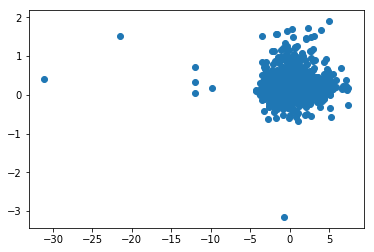

In [79]:
plt.scatter(Y_test,gbr_base_tfidf_2gram_pred)
plt.show()

In [80]:
# If we use all the text feature, the number of features are substaintially larger than the number of data we have
# this causes two main problem: 1. making the model prone to overfitting
#                               2. extremely costly to tune a model 

In [31]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer_1gram = CountVectorizer(stop_words = 'english', analyzer='word',binary = False, max_features= 50)
count_vectorizer_2gram = CountVectorizer(stop_words = 'english',analyzer='word', ngram_range = (1,2) , binary = False, max_features= 50)
tfid_vectorizer_1gram = TfidfVectorizer(stop_words = 'english', analyzer='word',binary = False, max_features= 50)
tfid_vectorizer_2gram = TfidfVectorizer(stop_words = 'english',analyzer='word', ngram_range= (1,2), binary = False,max_features= 50)

count_vectorizer_1gram.fit(x_train)
count_vectorizer_2gram.fit(x_train)

tfid_vectorizer_1gram.fit(x_train)
tfid_vectorizer_2gram.fit(x_train)


#count_vectorizer
count_train_1gram = count_vectorizer_1gram.transform(x_train)
count_test_1gram = count_vectorizer_1gram.transform(x_test)

count_train_2gram = count_vectorizer_2gram.transform(x_train)
count_test_2gram = count_vectorizer_2gram.transform(x_test)

#tfid_vectorizer
tf_train_1gram = tfid_vectorizer_1gram.transform(x_train)
tf_test_1gram = tfid_vectorizer_1gram.transform(x_test)

tf_train_2gram = tfid_vectorizer_2gram.transform(x_train)
tf_test_2gram = tfid_vectorizer_2gram.transform(x_test)

CPU times: user 3min 5s, sys: 2.26 s, total: 3min 7s
Wall time: 3min 7s


In [82]:
#doing cross validation for gradient boosting regressor

In [83]:
%%time
gbr = GradientBoostingRegressor()
parameters = {'n_estimators': [10, 50, 100, 200, 300], 'max_depth':[2,3,4,5], 'max_features':['auto','sqrt','log2']}
gbr_cv = GridSearchCV(gbr, parameters)
gbr_cv.fit(tf_train_2gram.todense(), Y_train)


CPU times: user 2min 31s, sys: 31 ms, total: 2min 31s
Wall time: 2min 31s


In [84]:
gbr_cv.best_params_

{'max_depth': 2, 'max_features': 'log2', 'n_estimators': 10}

In [85]:
gbr_opt = GradientBoostingRegressor(max_depth= 2, max_features='sqrt', n_estimators= 10)
gbr_opt.fit(tf_train_2gram, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [86]:
gbr_opt_tfidf_2gram_pred = gbr_opt.predict(tf_test_2gram.todense())
gbr_opt_tfidf_2gram_mse = mean_squared_error(Y_test, gbr_opt_tfidf_2gram_pred)
gbr_opt_tfidf_2gram_mae = mean_absolute_error(Y_test, gbr_opt_tfidf_2gram_pred)

In [87]:
print('mean squared error is {}'.format(gbr_opt_tfidf_2gram_mse))
print('mean absolute error is {}'.format(gbr_opt_tfidf_2gram_mae))

mean squared error is 4.016127097816454
mean absolute error is 1.379458460705143


In [40]:
df_train_x = pd.DataFrame(tf_train_2gram.todense(), index = x_train.index , columns = tfid_vectorizer_2gram.get_feature_names())
df_test_x = pd.DataFrame(tf_test_2gram.todense(), index = x_test.index , columns = tfid_vectorizer_2gram.get_feature_names())

In [41]:
tfid_vectorizer_2gram.get_feature_names()

['18',
 '2d',
 '3d',
 'appeal',
 'case',
 'cir',
 'cocaine',
 'conduct',
 'conspiracy',
 'conviction',
 'counsel',
 'court',
 'criminal',
 'ct',
 'defendant',
 'defendants',
 'denied',
 'did',
 'district',
 'district court',
 'does',
 'drug',
 'ed',
 'ed 2d',
 'error',
 'evidence',
 'federal',
 'government',
 'guidelines',
 'guilty',
 'id',
 'issue',
 'judge',
 'jury',
 'law',
 'motion',
 'mr',
 'offense',
 'reasonable',
 'rule',
 'sentence',
 'sentencing',
 'state',
 'states',
 'testimony',
 'time',
 'trial',
 'united',
 'united states',
 'violation']

In [42]:
df_train_x.head()

,18,2d,3d,appeal,case,cir,cocaine,conduct,conspiracy,conviction,...,sentence,sentencing,state,states,testimony,time,trial,united,united states,violation
5577,0.169819,0.054873,0.174669,0.080508,0.410566,0.068137,0.000000,0.000000,0.000000,0.171416,...,0.056193,0.080041,0.000000,0.148274,0.045451,0.170210,0.179406,0.135736,0.135757,0.118620
2072,0.144221,0.000000,0.000000,0.045582,0.041509,0.000000,0.000000,0.173358,0.000000,0.048526,...,0.265125,0.169939,0.122077,0.228952,0.064334,0.048184,0.050788,0.230550,0.230587,0.095943
7052,0.039509,0.031916,0.304782,0.018731,0.000000,0.253637,0.535524,0.000000,0.030270,0.039881,...,0.043578,0.046555,0.000000,0.250884,0.237926,0.039600,0.187828,0.252636,0.252676,0.019713
1582,0.000000,0.131258,0.167126,0.038516,0.052612,0.195583,0.653837,0.000000,0.000000,0.041003,...,0.044805,0.191461,0.025788,0.274068,0.190263,0.000000,0.257488,0.227279,0.227315,0.000000
587,0.076738,0.254158,0.000000,0.050932,0.066260,0.086211,0.000000,0.009224,0.681995,0.046476,...,0.008464,0.000000,0.000000,0.231462,0.010269,0.030766,0.129712,0.220810,0.220845,0.045945


In [43]:
df_test_x.head()

,18,2d,3d,appeal,case,cir,cocaine,conduct,conspiracy,conviction,...,sentence,sentencing,state,states,testimony,time,trial,united,united states,violation
2,0.000000,0.370186,0.033668,0.000000,0.056526,0.210134,0.000000,0.000000,0.150469,0.066081,...,0.000000,0.000000,0.000000,0.363743,0.000000,0.065616,0.000000,0.366283,0.366341,0.163315
5,0.022408,0.054303,0.042254,0.003541,0.032246,0.047950,0.000000,0.125695,0.034335,0.049006,...,0.024715,0.105613,0.037934,0.056322,0.064971,0.018716,0.059181,0.053731,0.053739,0.007453
17,0.036440,0.194279,0.000000,0.027640,0.056635,0.157903,0.432177,0.061322,0.312683,0.036782,...,0.064308,0.034350,0.000000,0.156189,0.165799,0.051133,0.177085,0.151455,0.151479,0.014545
18,0.123592,0.076799,0.097786,0.054085,0.090298,0.061032,0.000000,0.034283,0.000000,0.143947,...,0.073404,0.056012,0.675973,0.090555,0.025445,0.076231,0.100438,0.091187,0.091202,0.018974
23,0.008181,0.138790,0.168303,0.000000,0.014129,0.151002,0.457441,0.029503,0.188046,0.008258,...,0.027072,0.077123,0.000000,0.162351,0.164230,0.016401,0.060503,0.163485,0.163511,0.024492


In [44]:
df_train = df_train_x 
df_test = df_test_x

In [45]:
# append columns:
df_train[['Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','length_3m_dif']] = train_data[['Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','length_3m_dif']]
df_test[['Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','length_3m_dif']] = test_data[['Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','length_3m_dif']]

In [46]:
df_train.head()

,18,2d,3d,appeal,case,cir,cocaine,conduct,conspiracy,conviction,...,united,united states,violation,Affirmed,AffirmedInPart,Reversed,ReversedInPart,Vacated,VacatedInPart,length_3m_dif
5577,0.169819,0.054873,0.174669,0.080508,0.410566,0.068137,0.000000,0.000000,0.000000,0.171416,...,0.135736,0.135757,0.118620,0.0,0.0,0.0,1.0,0.0,0.0,-0.766357
2072,0.144221,0.000000,0.000000,0.045582,0.041509,0.000000,0.000000,0.173358,0.000000,0.048526,...,0.230550,0.230587,0.095943,1.0,0.0,0.0,0.0,0.0,0.0,0.608711
7052,0.039509,0.031916,0.304782,0.018731,0.000000,0.253637,0.535524,0.000000,0.030270,0.039881,...,0.252636,0.252676,0.019713,1.0,0.0,0.0,0.0,0.0,0.0,0.228592
1582,0.000000,0.131258,0.167126,0.038516,0.052612,0.195583,0.653837,0.000000,0.000000,0.041003,...,0.227279,0.227315,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,-3.150298
587,0.076738,0.254158,0.000000,0.050932,0.066260,0.086211,0.000000,0.009224,0.681995,0.046476,...,0.220810,0.220845,0.045945,0.0,0.0,0.0,0.0,0.0,0.0,-2.467751


In [47]:
df_test.head()

,18,2d,3d,appeal,case,cir,cocaine,conduct,conspiracy,conviction,...,united,united states,violation,Affirmed,AffirmedInPart,Reversed,ReversedInPart,Vacated,VacatedInPart,length_3m_dif
2,0.000000,0.370186,0.033668,0.000000,0.056526,0.210134,0.000000,0.000000,0.150469,0.066081,...,0.366283,0.366341,0.163315,0.0,0.0,1.0,0.0,0.0,0.0,-3.563471
5,0.022408,0.054303,0.042254,0.003541,0.032246,0.047950,0.000000,0.125695,0.034335,0.049006,...,0.053731,0.053739,0.007453,1.0,0.0,0.0,0.0,0.0,0.0,3.591201
17,0.036440,0.194279,0.000000,0.027640,0.056635,0.157903,0.432177,0.061322,0.312683,0.036782,...,0.151455,0.151479,0.014545,1.0,0.0,0.0,0.0,0.0,0.0,0.959357
18,0.123592,0.076799,0.097786,0.054085,0.090298,0.061032,0.000000,0.034283,0.000000,0.143947,...,0.091187,0.091202,0.018974,1.0,0.0,0.0,0.0,0.0,0.0,-1.595323
23,0.008181,0.138790,0.168303,0.000000,0.014129,0.151002,0.457441,0.029503,0.188046,0.008258,...,0.163485,0.163511,0.024492,1.0,0.0,0.0,0.0,0.0,0.0,-2.045180


In [49]:
train_data.head()

,Affirmed,AffirmedInPart,Reversed,ReversedInPart,Vacated,VacatedInPart,txt,length_3m_dif,bin
5577,0.0,0.0,0.0,1.0,0.0,0.0,"opinion of the court alito, circuit judge. th...",-0.766357,0
2072,1.0,0.0,0.0,0.0,0.0,0.0,"politz , chief judge: charles arthur daughenb...",0.608711,2
7052,1.0,0.0,0.0,0.0,0.0,0.0,"cyr, senior circuit judge. percio reynoso app...",0.228592,2
1582,1.0,0.0,0.0,0.0,0.0,0.0,"per curiam: appellant david earl kates, sente...",-3.150298,0
587,0.0,0.0,0.0,0.0,0.0,0.0,"george c. pratt , circuit judge: in theory th...",-2.467751,0


In [50]:
#df_train.to_csv("nn_prepared_train.csv", sep=',')
#df_test.to_csv("nn_prepared_test.csv", sep=',')

In [51]:
df_train = pd.read_csv("nn_prepared_train.csv", sep=',')
df_test = pd.read_csv("nn_prepared_test.csv", sep=',')

In [52]:
df_train.head()

,Unnamed: 0,18,2d,3d,appeal,case,cir,cocaine,conduct,conspiracy,...,united,united states,violation,Affirmed,AffirmedInPart,Reversed,ReversedInPart,Vacated,VacatedInPart,length_3m_dif
0,5577,0.169819,0.054873,0.174669,0.080508,0.410566,0.068137,0.000000,0.000000,0.000000,...,0.135736,0.135757,0.118620,0.0,0.0,0.0,1.0,0.0,0.0,-0.766357
1,2072,0.144221,0.000000,0.000000,0.045582,0.041509,0.000000,0.000000,0.173358,0.000000,...,0.230550,0.230587,0.095943,1.0,0.0,0.0,0.0,0.0,0.0,0.608711
2,7052,0.039509,0.031916,0.304782,0.018731,0.000000,0.253637,0.535524,0.000000,0.030270,...,0.252636,0.252676,0.019713,1.0,0.0,0.0,0.0,0.0,0.0,0.228592
3,1582,0.000000,0.131258,0.167126,0.038516,0.052612,0.195583,0.653837,0.000000,0.000000,...,0.227279,0.227315,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,-3.150298
4,587,0.076738,0.254158,0.000000,0.050932,0.066260,0.086211,0.000000,0.009224,0.681995,...,0.220810,0.220845,0.045945,0.0,0.0,0.0,0.0,0.0,0.0,-2.467751


In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6326 entries, 0 to 6325
Data columns (total 58 columns):
Unnamed: 0        6326 non-null int64
18                6326 non-null float64
2d                6326 non-null float64
3d                6326 non-null float64
appeal            6326 non-null float64
case              6326 non-null float64
cir               6326 non-null float64
cocaine           6326 non-null float64
conduct           6326 non-null float64
conspiracy        6326 non-null float64
conviction        6326 non-null float64
counsel           6326 non-null float64
court             6326 non-null float64
criminal          6326 non-null float64
ct                6326 non-null float64
defendant         6326 non-null float64
defendants        6326 non-null float64
denied            6326 non-null float64
did               6326 non-null float64
district          6326 non-null float64
district court    6326 non-null float64
does              6326 non-null float64
drug           

In [50]:
#basic nn architecture:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F

#used for batch training:
import torch.utils.data as Data

In [51]:
#read in data
xy_train = np.loadtxt("nn_prepared_train.csv", delimiter = ',' ,skiprows=1, dtype= np.float64 )

In [52]:
xy_test = np.loadtxt("nn_prepared_test.csv", delimiter = ',', skiprows =1 ,dtype = np.float64)

In [53]:
x_test = torch.from_numpy(xy_test[:,1:-1])
y_test = torch.from_numpy(xy_test[:,[-1]])

In [54]:
x_test = Variable(x_test.float())
y_test = Variable(y_test.float())

In [55]:
x_train = torch.from_numpy(xy_train[:,1:-1])
y_train = torch.from_numpy(xy_train[:,[-1]])

In [56]:
x_train = Variable(x_train.float())
y_train = Variable(y_train.float())

In [58]:
#define our own nn:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        
        self.hidden=torch.nn.Linear(n_features,n_hidden) 
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.predict=torch.nn.Linear(n_hidden,1) 
    def forward(self,x):
        x=F.relu(self.hidden(x)) 
        x=self.hidden2(x)
        x=self.predict(x) 
        return x
    

In [59]:
#initialize the net:
n_features = 56
net = Net(56, 20, 1)

In [60]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.3)
loss_func=torch.nn.MSELoss()
loss_func_MAe=torch.nn.L1Loss()

In [61]:
print(net)

Net (
  (hidden): Linear (56 -> 20)
  (hidden2): Linear (20 -> 20)
  (predict): Linear (20 -> 1)
)


In [62]:
#direct training:
for t in range(2000):
    print(t)
    prediction= net(x_train)
    loss=loss_func(prediction,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()   
    print(loss.data[0])
        

0
3.239598274230957
1
3.1036558151245117
2
3.103203535079956
3
3.1031510829925537
4
3.103101968765259
5
3.1030478477478027
6
3.1030044555664062
7
3.102952241897583
8
3.1029138565063477
9
3.1028659343719482
10
3.102818489074707
11
3.1027672290802
12
3.102726459503174
13
3.1026837825775146
14
3.102633237838745
15
3.102586269378662
16
3.102531671524048
17
3.102492332458496
18
3.102454423904419
19
3.102400779724121
20
3.1023619174957275
21
3.1023142337799072
22
3.102264642715454
23
3.1022262573242188
24
3.1021738052368164
25
3.102128744125366
26
3.1020700931549072
27
3.1020348072052
28
3.1019887924194336
29
3.101942777633667
30
3.101902961730957
31
3.1018640995025635
32
3.1018190383911133
33
3.1017730236053467
34
3.1017355918884277
35
3.1016805171966553
36
3.1016335487365723
37
3.101593017578125
38
3.101541757583618
39
3.1015028953552246
40
3.101447343826294
41
3.101409435272217
42
3.101364850997925
43
3.1013078689575195
44
3.1012606620788574
45
3.1012160778045654
46
3.101154327392578
47
3

In [63]:
#batch training:
BATCH_SIZE = 500
x_train = torch.from_numpy(xy_train[:,1:-1])
y_train = torch.from_numpy(xy_train[:,[-1]])

torch_dataset = Data.TensorDataset(data_tensor = x_train, target_tensor = y_train)
loader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = 2,)

In [77]:
#training:
for epoch in range(100):
    for step, (batch_x, batch_y) in enumerate(loader):
        print('Epoch:', epoch, '| Step: ', step)
        
        b_x = Variable(batch_x.float())
        b_y = Variable(batch_y.float())
        
        prediction = net(b_x)
        train_loss = loss_func(prediction, b_y)
        print('training loss is: ',train_loss.data[0])

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        #validation loss:
        if (step+1) % 13 ==0:
            validation_output = net(x_test)
            print(type(validation_output))
            validation_loss_MAE = loss_func_MAe(validation_output, y_test)
            validation_loss_MSE = loss_func(validation_output, y_test)
            print('MAE is:',validation_loss_MAE.data[0])
            print("MSE is:",validation_loss_MSE.data[0] )
            print('\n')
            
            

Epoch: 0 | Step:  0
training loss is:  2.2752249240875244
Epoch: 0 | Step:  1
training loss is:  2.5938479900360107
Epoch: 0 | Step:  2
training loss is:  2.104236602783203
Epoch: 0 | Step:  3
training loss is:  2.7231695652008057
Epoch: 0 | Step:  4
training loss is:  2.723329782485962
Epoch: 0 | Step:  5
training loss is:  2.6355268955230713
Epoch: 0 | Step:  6
training loss is:  2.542234420776367
Epoch: 0 | Step:  7
training loss is:  2.2264935970306396
Epoch: 0 | Step:  8
training loss is:  2.5353524684906006
Epoch: 0 | Step:  9
training loss is:  2.1147537231445312
Epoch: 0 | Step:  10
training loss is:  2.6018459796905518
Epoch: 0 | Step:  11
training loss is:  2.4730992317199707
Epoch: 0 | Step:  12
training loss is:  2.6352806091308594
<class 'torch.autograd.variable.Variable'>
MAE is: 1.5746769905090332
MSE is: 4.9648003578186035


Epoch: 1 | Step:  0
training loss is:  2.450000286102295
Epoch: 1 | Step:  1
training loss is:  2.395557165145874
Epoch: 1 | Step:  2
training loss

In [87]:
final_prediction_y = net(x_test).data.numpy()
true_y = y_test.data.numpy()
plt.scatter(true_y, final_prediction_y)


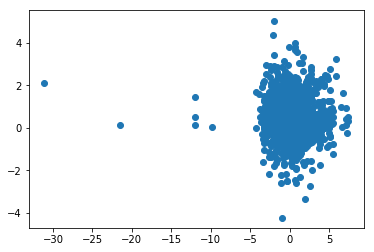

In [88]:
plt.show()